Import reqiured libraries

In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.datasets import cifar10
from keras import models, layers
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Load the cifar10 dataset

In [34]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [35]:
train_images.shape

(50000, 32, 32, 3)

In [36]:
train_labels[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [37]:
test_images.shape

(10000, 32, 32, 3)

In [38]:
test_labels[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [39]:
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)

Normalizing the data

In [40]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

In [41]:
train_images[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

Split the data train and validation set

In [42]:
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42, shuffle=True)

CNN Model Building

In [50]:
def create_cnn_model():
    cnn_model = models.Sequential()
    cnn_model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3), padding="Same"))
    cnn_model.add(layers.MaxPooling2D(2,2))
    cnn_model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="Same"))
    cnn_model.add(layers.MaxPooling2D(2,2))
    cnn_model.add(layers.Flatten())
    cnn_model.add(layers.Dense(64, activation='relu'))
    cnn_model.add(layers.Dropout(0.5))
    cnn_model.add(layers.Dense(10, activation='softmax'))
    return cnn_model

Epoch 1/20
1250/1250 [==============================] - 22s 17ms/step - loss: 1.7894 - accuracy: 0.3304 - val_loss: 1.3742 - val_accuracy: 0.5304
Epoch 2/20
1250/1250 [==============================] - 22s 18ms/step - loss: 1.5161 - accuracy: 0.4407 - val_loss: 1.2903 - val_accuracy: 0.5534
Epoch 3/20
1250/1250 [==============================] - 21s 17ms/step - loss: 1.3798 - accuracy: 0.4937 - val_loss: 1.1523 - val_accuracy: 0.5888
Epoch 4/20
1250/1250 [==============================] - 22s 18ms/step - loss: 1.2823 - accuracy: 0.5324 - val_loss: 1.0738 - val_accuracy: 0.6222
Epoch 5/20
1250/1250 [==============================] - 21s 17ms/step - loss: 1.2065 - accuracy: 0.5641 - val_loss: 1.0748 - val_accuracy: 0.6285
Epoch 6/20
1250/1250 [==============================] - 21s 17ms/step - loss: 1.1506 - accuracy: 0.5867 - val_loss: 1.0115 - val_accuracy: 0.6353
Epoch 7/20
1250/1250 [==============================] - 22s 17ms/step - loss: 1.0969 - accuracy: 0.6053 - val_loss: 0.9709 -

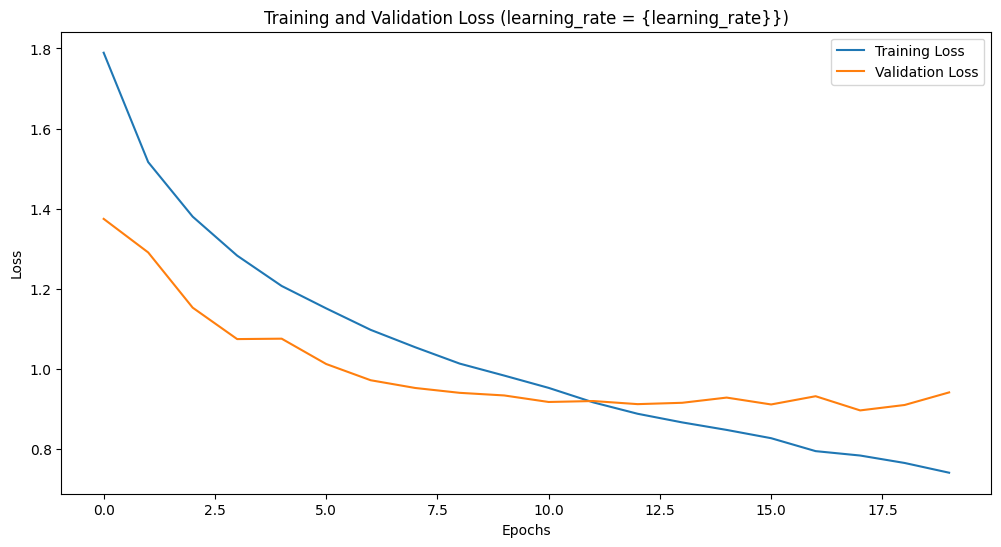

In [51]:
# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
cnn_model = create_cnn_model()
cnn_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model for 20 epochs
num_epochs = 20
history = cnn_model.fit(train_images,
                        train_labels,
                        epochs=num_epochs,
                        validation_data=(valid_images, valid_labels))

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (learning_rate = {learning_rate}})')
plt.show()

In [52]:
from sklearn.metrics import confusion_matrix

# Evaluate the model on the train and test data
train_loss, train_accuracy = cnn_model.evaluate(train_images, train_labels)
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)

# Make predictions on the train and test data
train_predictions = cnn_model.predict(train_images)
train_predicted_labels = np.argmax(train_predictions, axis=1)
test_predictions = cnn_model.predict(test_images)
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Generate confusion matrix
train_confusion_mtx = confusion_matrix(train_labels, train_predicted_labels)
test_confusion_mtx = confusion_matrix(test_labels, test_predicted_labels)


print("\nTraining Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Training Confusion Matrix:")
print(train_confusion_mtx)
print("\n\nTesting Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Testing Confusion Matrix:")
print(test_confusion_mtx)

313/313 [==============================] - 2s 5ms/step

Training Accuracy: 84.61%
Training Confusion Matrix:
[[3488   19  133   47   47   22    3   19  197   52]
 [  29 3807    0   11    2    3    9    0   32  128]
 [ 129    4 2756  179  382  273  158   56   25    8]
 [  18    2  101 2794  142  748  113   37   17    5]
 [  62    3  135  119 3387  116   78  157    7    3]
 [   5    4   86  547  114 3136   29   56    2    6]
 [   4   10  100  230  125   43 3476    1    8    7]
 [   7    0   50   59  113  152    5 3607    5    8]
 [  95   26   28   33    9   10    8    2 3735   37]
 [  46  166    8   29    3    5    3   11   29 3660]]


Testing Accuracy: 69.69%
Testing Confusion Matrix:
[[746  18  65  18  11  12  12  12  72  34]
 [ 24 811   5   9   4   6  11   2  30  98]
 [ 59   3 509  66 120 114  74  33  14   8]
 [ 23   8  43 519  75 230  49  32  10  11]
 [ 22   4  66  67 643  55  52  75  11   5]
 [ 11   4  34 178  48 659  14  40   9   3]
 [  4   5  37 114  53  23 751   6   1   6]
 [  6 

Plot training and validation loss for different learning rates

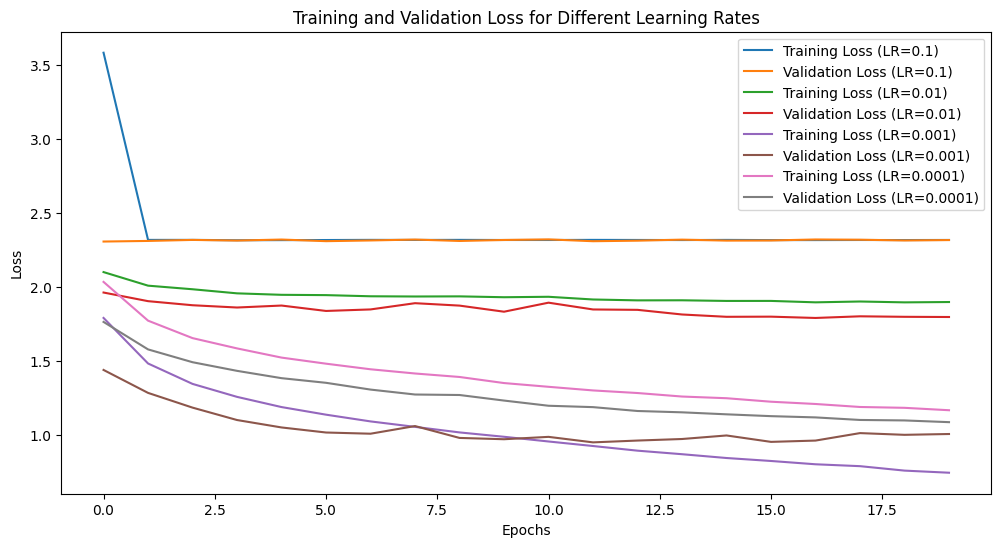

In [53]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]

plt.figure(figsize=(12, 6))

for lr in learning_rates:
    cnn_model = create_cnn_model()
    cnn_model.compile(optimizer=Adam(learning_rate=lr),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    # Train the model for 20 epochs
    history = cnn_model.fit(train_images,
                            train_labels,
                            epochs=20,
                            validation_split=0.2,
                            verbose=0)

    # Plot training and validation loss
    plt.plot(history.history['loss'], label=f'Training Loss (LR={lr})')
    plt.plot(history.history['val_loss'], label=f'Validation Loss (LR={lr})')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for Different Learning Rates')
plt.show()

# Using DenseNet and VGG

In [ ]:
from tensorflow.keras.applications import DenseNet121, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [41]:
train_labels_encoded = to_categorical(train_labels, num_classes=10)
test_labels_encoded = to_categorical(test_labels, num_classes=10)

In [42]:
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = densenet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
densenet_model = Model(inputs=densenet_base.input, outputs=predictions)

for layer in densenet_base.layers:
    layer.trainable = False

densenet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
densenet_checkpoint = ModelCheckpoint('densenet_fine_tuned.h5', save_best_only=True)
densenet_history = densenet_model.fit(train_images, train_labels_encoded, epochs=10, validation_data=(test_images, test_labels_encoded), callbacks=[densenet_checkpoint])

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 1.2176 - accuracy: 0.5723

c:\Users\ladca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - 158s 98ms/step - loss: 1.2176 - accuracy: 0.5723 - val_loss: 1.1092 - val_accuracy: 0.6143
Epoch 2/10
1563/1563 [==============================] - 152s 97ms/step - loss: 1.0194 - accuracy: 0.6411 - val_loss: 1.0743 - val_accuracy: 0.6270
Epoch 3/10
1563/1563 [==============================] - 163s 104ms/step - loss: 0.9409 - accuracy: 0.6681 - val_loss: 1.0146 - val_accuracy: 0.6490
Epoch 4/10
1563/1563 [==============================] - 151s 96ms/step - loss: 0.8767 - accuracy: 0.6894 - val_loss: 1.0477 - val_accuracy: 0.6438
Epoch 5/10
1563/1563 [==============================] - 143s 91ms/step - loss: 0.8113 - accuracy: 0.7132 - val_loss: 1.0337 - val_accuracy: 0.6504
Epoch 6/10
1563/1563 [==============================] - 139s 89ms/step - loss: 0.7594 - accuracy: 0.7285 - val_loss: 1.0490 - val_accuracy: 0.6452
Epoch 7/10
1563/1563 [==============================] - 137s 87ms/step - loss: 0.7065 - accuracy: 0.7486 - val_loss: 1.0753 - va

In [43]:
densenet_train_loss = densenet_history.history['loss']
densenet_val_loss = densenet_history.history['val_loss']

densenet_model.load_weights('densenet_fine_tuned.h5')
densenet_test_loss, densenet_test_acc = densenet_model.evaluate(test_images, test_labels_encoded)

print(f'DenseNet Test Accuracy: {densenet_test_acc}')

313/313 [==============================] - 24s 76ms/step - loss: 1.0146 - accuracy: 0.6490
DenseNet Test Accuracy: 0.6489999890327454


In [44]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = vgg_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
vgg_model = Model(inputs=vgg_base.input, outputs=predictions)

for layer in vgg_base.layers:
    layer.trainable = False

vgg_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
vgg_checkpoint = ModelCheckpoint('vgg_fine_tuned.h5', save_best_only=True)
vgg_history = vgg_model.fit(train_images, train_labels_encoded, epochs=10, validation_data=(test_images, test_labels_encoded), callbacks=[vgg_checkpoint])

Epoch 1/10
1563/1563 [==============================] - 313s 200ms/step - loss: 1.3407 - accuracy: 0.5330 - val_loss: 1.2339 - val_accuracy: 0.5632
Epoch 2/10
1563/1563 [==============================] - 307s 196ms/step - loss: 1.1677 - accuracy: 0.5923 - val_loss: 1.1912 - val_accuracy: 0.5804
Epoch 3/10
1563/1563 [==============================] - 312s 200ms/step - loss: 1.1041 - accuracy: 0.6138 - val_loss: 1.1521 - val_accuracy: 0.5952
Epoch 4/10
1563/1563 [==============================] - 313s 201ms/step - loss: 1.0571 - accuracy: 0.6277 - val_loss: 1.1340 - val_accuracy: 0.6003
Epoch 5/10
1563/1563 [==============================] - 307s 196ms/step - loss: 1.0162 - accuracy: 0.6410 - val_loss: 1.1288 - val_accuracy: 0.6062
Epoch 6/10
1563/1563 [==============================] - 309s 198ms/step - loss: 0.9789 - accuracy: 0.6571 - val_loss: 1.1465 - val_accuracy: 0.5969
Epoch 7/10
1563/1563 [==============================] - 308s 197ms/step - loss: 0.9465 - accuracy: 0.6671 - val_

In [45]:
vgg_train_loss = vgg_history.history['loss']
vgg_val_loss = vgg_history.history['val_loss']

vgg_model.load_weights('vgg_fine_tuned.h5')
vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_images, test_labels_encoded)
print(f'VGG Test Accuracy: {vgg_test_acc}')

313/313 [==============================] - 52s 167ms/step - loss: 1.1094 - accuracy: 0.6226
VGG Test Accuracy: 0.6226000189781189
